In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import os
import sys
import math

from datetime import datetime
from datetime import timedelta
import datetime
from scipy import spatial

from numpy import array
from numpy import corrcoef

from scipy.spatial import distance

In [7]:
def dist_euclidian(v1,v2):
    return distance.euclidean(v1, v2)

def measure_cossine(v1,v2):
    return (1 - spatial.distance.cosine(v1, v2))

def measure_correlation(v1,v2):
    return corrcoef(v1,v2)[0,1]

def dist_correlation(dc):
    return math.sqrt(2 *(1 - dc))

def measure_angle(arcc):
    return math.degrees(np.arccos(arcc))

In [8]:
s1 = np.array([[1,0.92,0.95,1], 
               [0.92,0.52,0.65,0.74],
               [0.82,0.44,0.65,0.74],
               [0.74,0.32,0.65,0.75]
              ], np.float)

In [36]:
for x in range(4):
    for y in range(4):
        print("cor(",x,",", y, ")", (measure_correlation(s1[x],s1[y])))
    print("------")

cor( 0 , 0 ) 1.0
cor( 0 , 1 ) 0.8984163361292166
cor( 0 , 2 ) 0.9499181728994217
cor( 0 , 3 ) 0.9145402030024959
------
cor( 1 , 0 ) 0.8984163361292166
cor( 1 , 1 ) 1.0
cor( 1 , 2 ) 0.9500499338062038
cor( 1 , 3 ) 0.8285800547286097
------
cor( 2 , 0 ) 0.9499181728994217
cor( 2 , 1 ) 0.9500499338062038
cor( 2 , 2 ) 1.0
cor( 2 , 3 ) 0.9619054219755082
------
cor( 3 , 0 ) 0.9145402030024959
cor( 3 , 1 ) 0.8285800547286097
cor( 3 , 2 ) 0.9619054219755081
cor( 3 , 3 ) 1.0
------


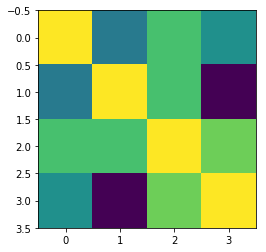

In [55]:
m=np.zeros((4,4))

for x in range(4):
    line = ""
    for y in range(4):
        m[x,y]=measure_correlation(s1[x],s1[y])
        value = measure_correlation(s1[x],s1[y])
        value = round(value,3)
        line = line + str(value) + " "
        
    #print(line)
#print (m)
plt.imshow(m)
plt.show()

In [43]:
x = round(5.76543, 2)
print(x)

5.77


0.8984163361292166
0.985282359571441


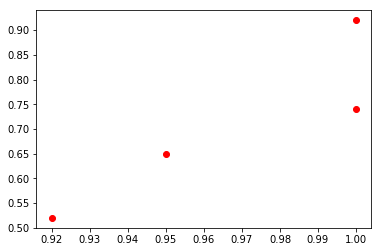

In [31]:
print((measure_correlation(s1[0],s1[1])))
print((measure_cossine(s1[0],s1[1])))
plt.plot(s1[0], s1[1], 'ro')   
plt.show()

0.9499181728994217
0.9842526708171008


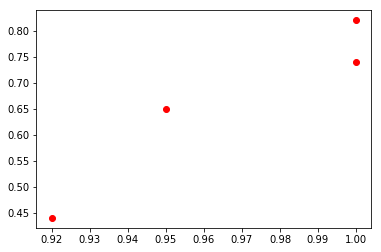

In [16]:
print((measure_correlation(s1[0],s1[2])))
print((measure_cossine(s1[0],s1[2])))
plt.plot(s1[0], s1[2], 'ro')   
plt.show()

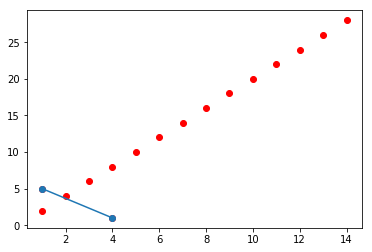

In [4]:
plt.plot(s1[0], s1[1], 'ro')   
x1, y1 = [1, 4], [5, 1]
plt.plot(x1, y1, marker = 'o')
plt.show()

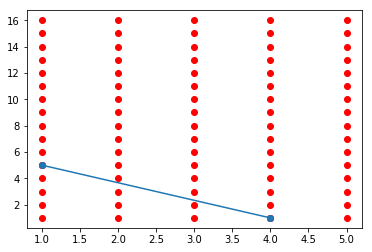

In [5]:
plt.plot(s2[0], s2[1], 'ro')   
x1, y1 = [1, 4], [5, 1]
plt.plot(x1, y1, marker = 'o')
plt.show()

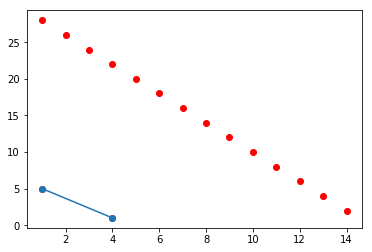

In [6]:
plt.plot(s3[0], s3[1], 'ro')
x1, y1 = [1, 4], [5, 1]
plt.plot(x1, y1, marker = 'o')
plt.show()

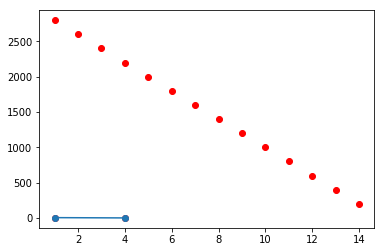

In [7]:
plt.plot(s4[0], s4[1], 'ro')  
x1, y1 = [1, 4], [5, 1]
plt.plot(x1, y1, marker = 'o')
plt.show()

In [8]:
df1 = pd.DataFrame(np.transpose(s1))
df1.corr()
np.linalg.det(df1.corr())

0.0486985765317589

In [9]:
df2 = pd.DataFrame(np.transpose(s2))
df2.corr()
np.linalg.det(df2.corr())

0.9999986206178744

In [10]:
df3 = pd.DataFrame(np.transpose(s3))
df3.corr()
np.linalg.det(df3.corr())

0.6071754577647597

In [11]:
df4 = pd.DataFrame(np.transpose(s4))
df4.corr()
np.linalg.det(df4.corr())

0.7075183039738978

In [12]:
print((measure_correlation(s1[0],s1[1])))
print((measure_correlation(s2[0],s2[1])))
print((measure_correlation(s3[0],s3[1])))

0.9753468221449438
-0.0011744709981989822
-0.6267571636888087


In [13]:
print(dist_euclidian(s1[0][14],s1[1][14]))
print(dist_euclidian(s2[0][16],s2[1][16]))
print(dist_euclidian(s3[0][14],s3[1][14]))

4.0
1.0
4.0


In [14]:
s1[0]

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14.,  1.,  4.])

In [15]:
s1[1]

array([ 2.,  4.,  6.,  8., 10., 12., 14., 16., 18., 20., 22., 24., 26.,
       28.,  5.,  1.])

In [16]:
S1 = df1.corr()
S2 = df2.corr()
S3 = df3.corr()
S4 = df4.corr()

In [17]:
p1 = (s1[0][14],s1[1][14])
p1

(1.0, 5.0)

In [18]:
p2 = (s1[0][15],s1[1][15])
p2

(4.0, 1.0)

In [19]:
de = dist_euclidian(p1,p2)
de_desc = "| [distancia]"
print(dist_euclidian(p1,p2))

5.0


In [20]:
dm1 = distance.mahalanobis(p1, p2, S1)
dm2 = distance.mahalanobis(p1, p2, S2)
dm3 = distance.mahalanobis(p1, p2, S3)
dm4 = distance.mahalanobis(p1, p2, S4)

print("distance euclidiana")
print(de, de_desc)
print("distance mahalanobis")
print(distance.mahalanobis(p1, p2, S1), s1_desc)
print(distance.mahalanobis(p1, p2, S2), s2_desc)
print(distance.mahalanobis(p1, p2, S3), s3_desc)
print(distance.mahalanobis(p1, p2, S4), s4_desc)

distance euclidiana
5.0 | [distancia]
distance mahalanobis
1.2616165299017539 | [correlacao cresc]
5.002817936319167 | [correlacao nula]
6.3278884257334544 | [correlacao desc
6.162757374471268 | [correlacao  desc + 


In [21]:
print(abs(1 -  dm1/de) * 100)
print(abs(1  - dm2/de) * 100)
print(abs(1  - dm3/de) * 100)
print(abs(1  - dm4/de) * 100)

74.76766940196492
0.05635872638334316
26.55776851466909
23.255147489425365
